In [1]:
#Import important packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist

from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized

from mpdaf.obj import Image
data_path = "/home/carlos/Desktop/HST Data Reduction/Data/Centered/"

In [2]:
def dist_circle(xc, yc, s):
    """
    Returns an array in which the value of each element is its distance from
    a specified center. Useful for masking inside a circular aperture.

    The (xc, yc) coordinates are the ones one can read on the figure axes
    e.g. when plotting the result of my find_galaxy() procedure.

    """
    x, y = np.ogrid[:s[0], :s[1]] - np.array([yc, xc])  # note yc before xc
    rad = np.sqrt(x**2 + y**2)

    return rad

In [3]:
#Open the file with the psf

file = data_path+'HST_final.fits'
hdu = fits.open(file)               #Abrindo imagem
img = hdu[1].data                   #Pega os dados da img
img_data = hdu[1].data              #Pega os dados da img

where_are_NaNs = np.isnan(img)
img[where_are_NaNs] = 0

In [4]:
minlevel = 0.4    #counts/px
sky = 0.3         #counts/px
scale = 0.09      #arcsec/pxz
img = img - sky

In [5]:
#MGE PSF for F160w, after build an ePSF with DAOPHOT

normpsf, sigmapsf = np.loadtxt("Psf_model.txt", unpack=True)

print(normpsf.sum()) # Should total(normpsf)=1

1.0


 Pixels used: 1266
 Peak Img[j, k]: 58 54
 Mean (j, k): 57.74 54.16
 Theta (deg): 78.4
 Astro PA (deg): 11.6
 Eps: 0.150
 Major axis (pix): 22.5


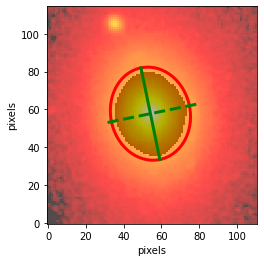

In [6]:
    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
plt.clf()
f = find_galaxy(img, fraction=0.1, plot=1)

In [7]:
r = dist_circle(35, 106, img.shape)  # 
mask = r > 6                        

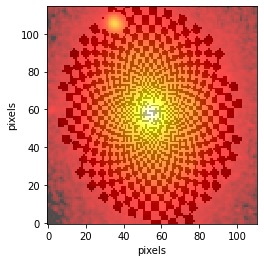

In [8]:
# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=0.04, plot=1,mask=mask)

Iteration: 1  chi2: 2.75  Nonzero: 8/20
Iteration: 11  chi2: 0.8091  Nonzero: 9/20
Iteration: 21  chi2: 0.5202  Nonzero: 11/20
Iteration: 31  chi2: 0.4539  Nonzero: 11/20
Iteration: 41  chi2: 0.4539  Nonzero: 10/20
Nonzero Gaussians: 10/20
Eliminating not useful Gaussians...
ngauss: 9           chi2: 0.454
Starting nonlinear fit...
Iteration: 1  chi2: 0.4541  Nonzero: 9/9
Nonzero Gaussians: 9/9
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 3.74 seconds
  Total Iterations:  48
 Nonzero Gaussians:  9
  Unused Gaussians:  11
 Sectors used in the fit:  19
 Total number of points fitted:  480
 Chi2: 0.4537 
 STDEV: 0.03073 
 MEANABSDEV: 0.02035 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      131.663     0.507669     0.727646
      258.799      1.48848     0.598145
      193.937      2.88642     0.857148
      143.329       6.

Nonzero Gaussians: 9/20
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration: 1  chi2: 0.4549  Nonzero: 9/9
Nonzero Gaussians: 9/9
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 3.23 seconds
  Total Iterations:  40
 Nonzero Gaussians:  9
  Unused Gaussians:  11
 Sectors used in the fit:  19
 Total number of points fitted:  480
 Chi2: 0.4542 
 STDEV: 0.03075 
 MEANABSDEV: 0.02041 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      131.742     0.507669     0.728274
      258.206      1.48845     0.593567
      193.757      2.87816      0.86298
      141.388      6.10762     0.551171
      454.328      6.72045            1
      628.375      13.1747     0.901925
      76.7109      16.2387          0.3
      619.095      29.5202            1
      585.619      29.5202     0.590331
++++++++++++++++++++++++++++++

Iteration: 11  chi2: 0.9454  Nonzero: 7/20
Iteration: 21  chi2: 0.6967  Nonzero: 9/20
Nonzero Gaussians: 8/20
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration: 1  chi2: 0.5893  Nonzero: 8/8
Nonzero Gaussians: 8/8
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 2.24 seconds
  Total Iterations:  30
 Nonzero Gaussians:  8
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  480
 Chi2: 0.5878 
 STDEV: 0.03497 
 MEANABSDEV: 0.02318 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      139.912     0.507669     0.714404
      245.346      1.52664     0.584438
      197.707      2.80935      0.84437
      385.657      6.40144         0.95
      155.938      6.77369         0.55
      549.957      11.7146         0.95
      269.956      19.1112         0.55
      1118.59      29.52

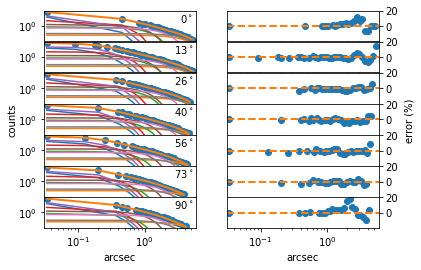

In [9]:
# Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************
plt.clf()
m = mge_fit_sectors_regularized(s.radius, s.angle, s.counts, f.eps,
                       ngauss= 20, sigmapsf=sigmapsf, normpsf=normpsf,
                        scale=scale, plot=1)

<Figure size 432x288 with 0 Axes>

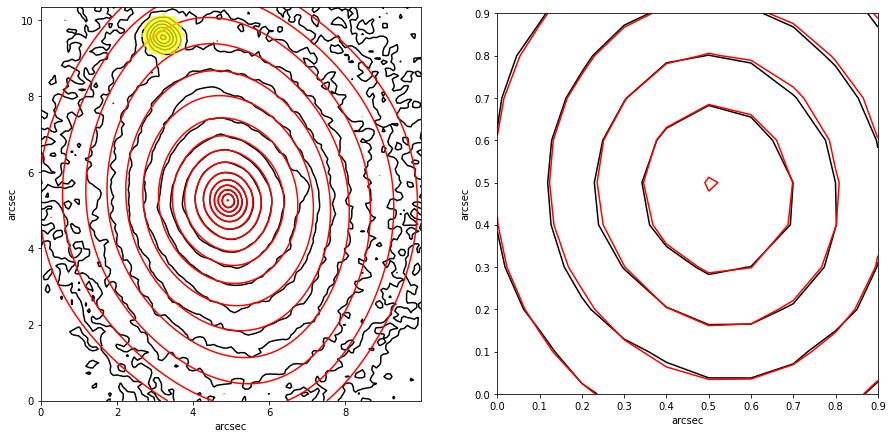

In [11]:
plt.clf()
plt.figure(figsize=(15,15))
plt.subplot(121)
ctc, model = mge_print_contours(img, f.theta, f.xmed+0.15, f.ymed,m.sol, scale=scale,
                        sigmapsf=sigmapsf, normpsf=normpsf, magrange=8, mask=mask)


n = 5
img_sub = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
ctc2, model2 = mge_print_contours(img_sub, f.theta, xc+0.1, yc+0.09, m.sol,
                       sigmapsf=sigmapsf, normpsf=normpsf, scale=scale)

plt.show()

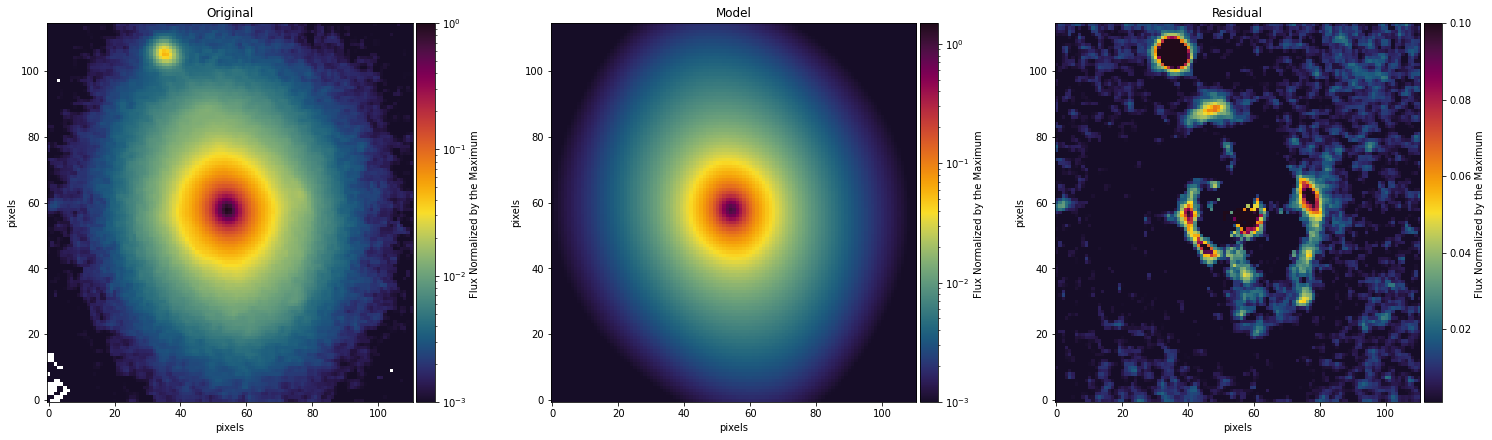

In [92]:
import cmasher as cmr
cmap = cmr.pride
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(1,3, figsize=(25, 7))
plt.subplots_adjust(hspace=0.0, wspace=0.3)

#Image
origial_plt = axes[0].imshow(img/img.max(), origin='lower', norm=LogNorm(vmin=1e-3, vmax=1) , cmap=cmap)
axes[0].set_title("Original")
axes[0].set_xlabel('pixels')
axes[0].set_ylabel('pixels')

divider = make_axes_locatable(axes=axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(origial_plt, ax=axes[0], cax=cax,label="Flux Normalized by the Maximum ")


#Model
model_plt = axes[1].imshow(model/model.max(), origin='lower', norm=LogNorm(vmin=1e-3, vmax=1.5), cmap=cmap)
axes[1].set_title("Model")
axes[1].set_xlabel('pixels')
axes[1].set_ylabel('pixels')

divider = make_axes_locatable(axes=axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(model_plt, ax=axes[1], cax=cax, label="Flux Normalized by the Maximum ")


#Residual
diff_plt = axes[2].imshow( ( (img - model)/(img - model).max() ) , origin='lower',vmin=1e-3, vmax=1e-1, cmap=cmap)
axes[2].set_title("Residual")
axes[2].set_xlabel('pixels')
axes[2].set_ylabel('pixels')

divider = make_axes_locatable(axes=axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(diff_plt, ax=axes[2], cax=cax,  label="Flux Normalized by the Maximum ")

#plt.savefig("SDP81_MGE_with_arcs.png",
#                    fmt="png", bbox_inches='tight', dpi=200)

In [12]:
# Save model and diff in fits files
save_path = "/home/carlos/Desktop/HST Data Reduction/Data/MGE Models/"

fits.writeto(filename=save_path+"Model_with_arcs.fits", data=model, overwrite=True)
fits.writeto(filename=save_path+"Arcs_Resisual.fits", data=(img - model), overwrite=True)

In [13]:
#Save MGE components
np.savetxt('MGE_Output_with_arcs.txt', np.column_stack([m.sol[0], m.sol[1], m.sol[2]]),
           fmt=b'\t%10.6f\t %10.6f\t %10.6f\t ', 
           header='\tTotal_Counts\t Sigma_Pixels\t     qObs\t', delimiter='\t')